In [60]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [61]:
dft=pd.read_csv('tokyo_limpio.csv')
dft.head(3)

,Unnamed: 0,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,room_type,bathrooms_text,amenities,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,0,1.0,2.0,35.71707,139.82608,2.0,1.0,1.0,2.0,12000.0,...,Entire home/apt,1 bath,"[""Free washer \u2013 In unit"", ""Self check-in""...",nulos,t,2024-06-30,2011-09-21,2024-05-15,M130003350,f
1,1,1.0,6.0,35.73844,139.76917,1.0,1.0,1.0,1.0,9652.0,...,Private room,1 shared bath,"[""Bed linens"", ""Ethernet connection"", ""Hot wat...",nulos,t,2024-06-29,2012-11-28,2024-06-03,M130000243,f
2,2,6.0,17.0,35.67878,139.67847,6.0,1.0,2.0,4.0,25738.0,...,Entire home/apt,1 bath,"[""Bed linens"", ""Dining table"", ""Self check-in""...",nulos,t,2024-06-30,2013-04-07,2024-06-19,Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生...,t


In [62]:
# Eliminar el símbolo % y convertir a numérico
dft['host_acceptance_rate'] = dft['host_acceptance_rate'].str.rstrip('%').astype('float') / 100
dft['host_response_rate'] = dft['host_response_rate'].str.rstrip('%').astype('float') / 100

In [63]:
variablesselec_t=dft[['host_response_rate','host_acceptance_rate','host_total_listings_count','accommodates','reviews_per_month','price'
                    ,'bedrooms','beds','latitude','longitude','bathrooms']]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_ol

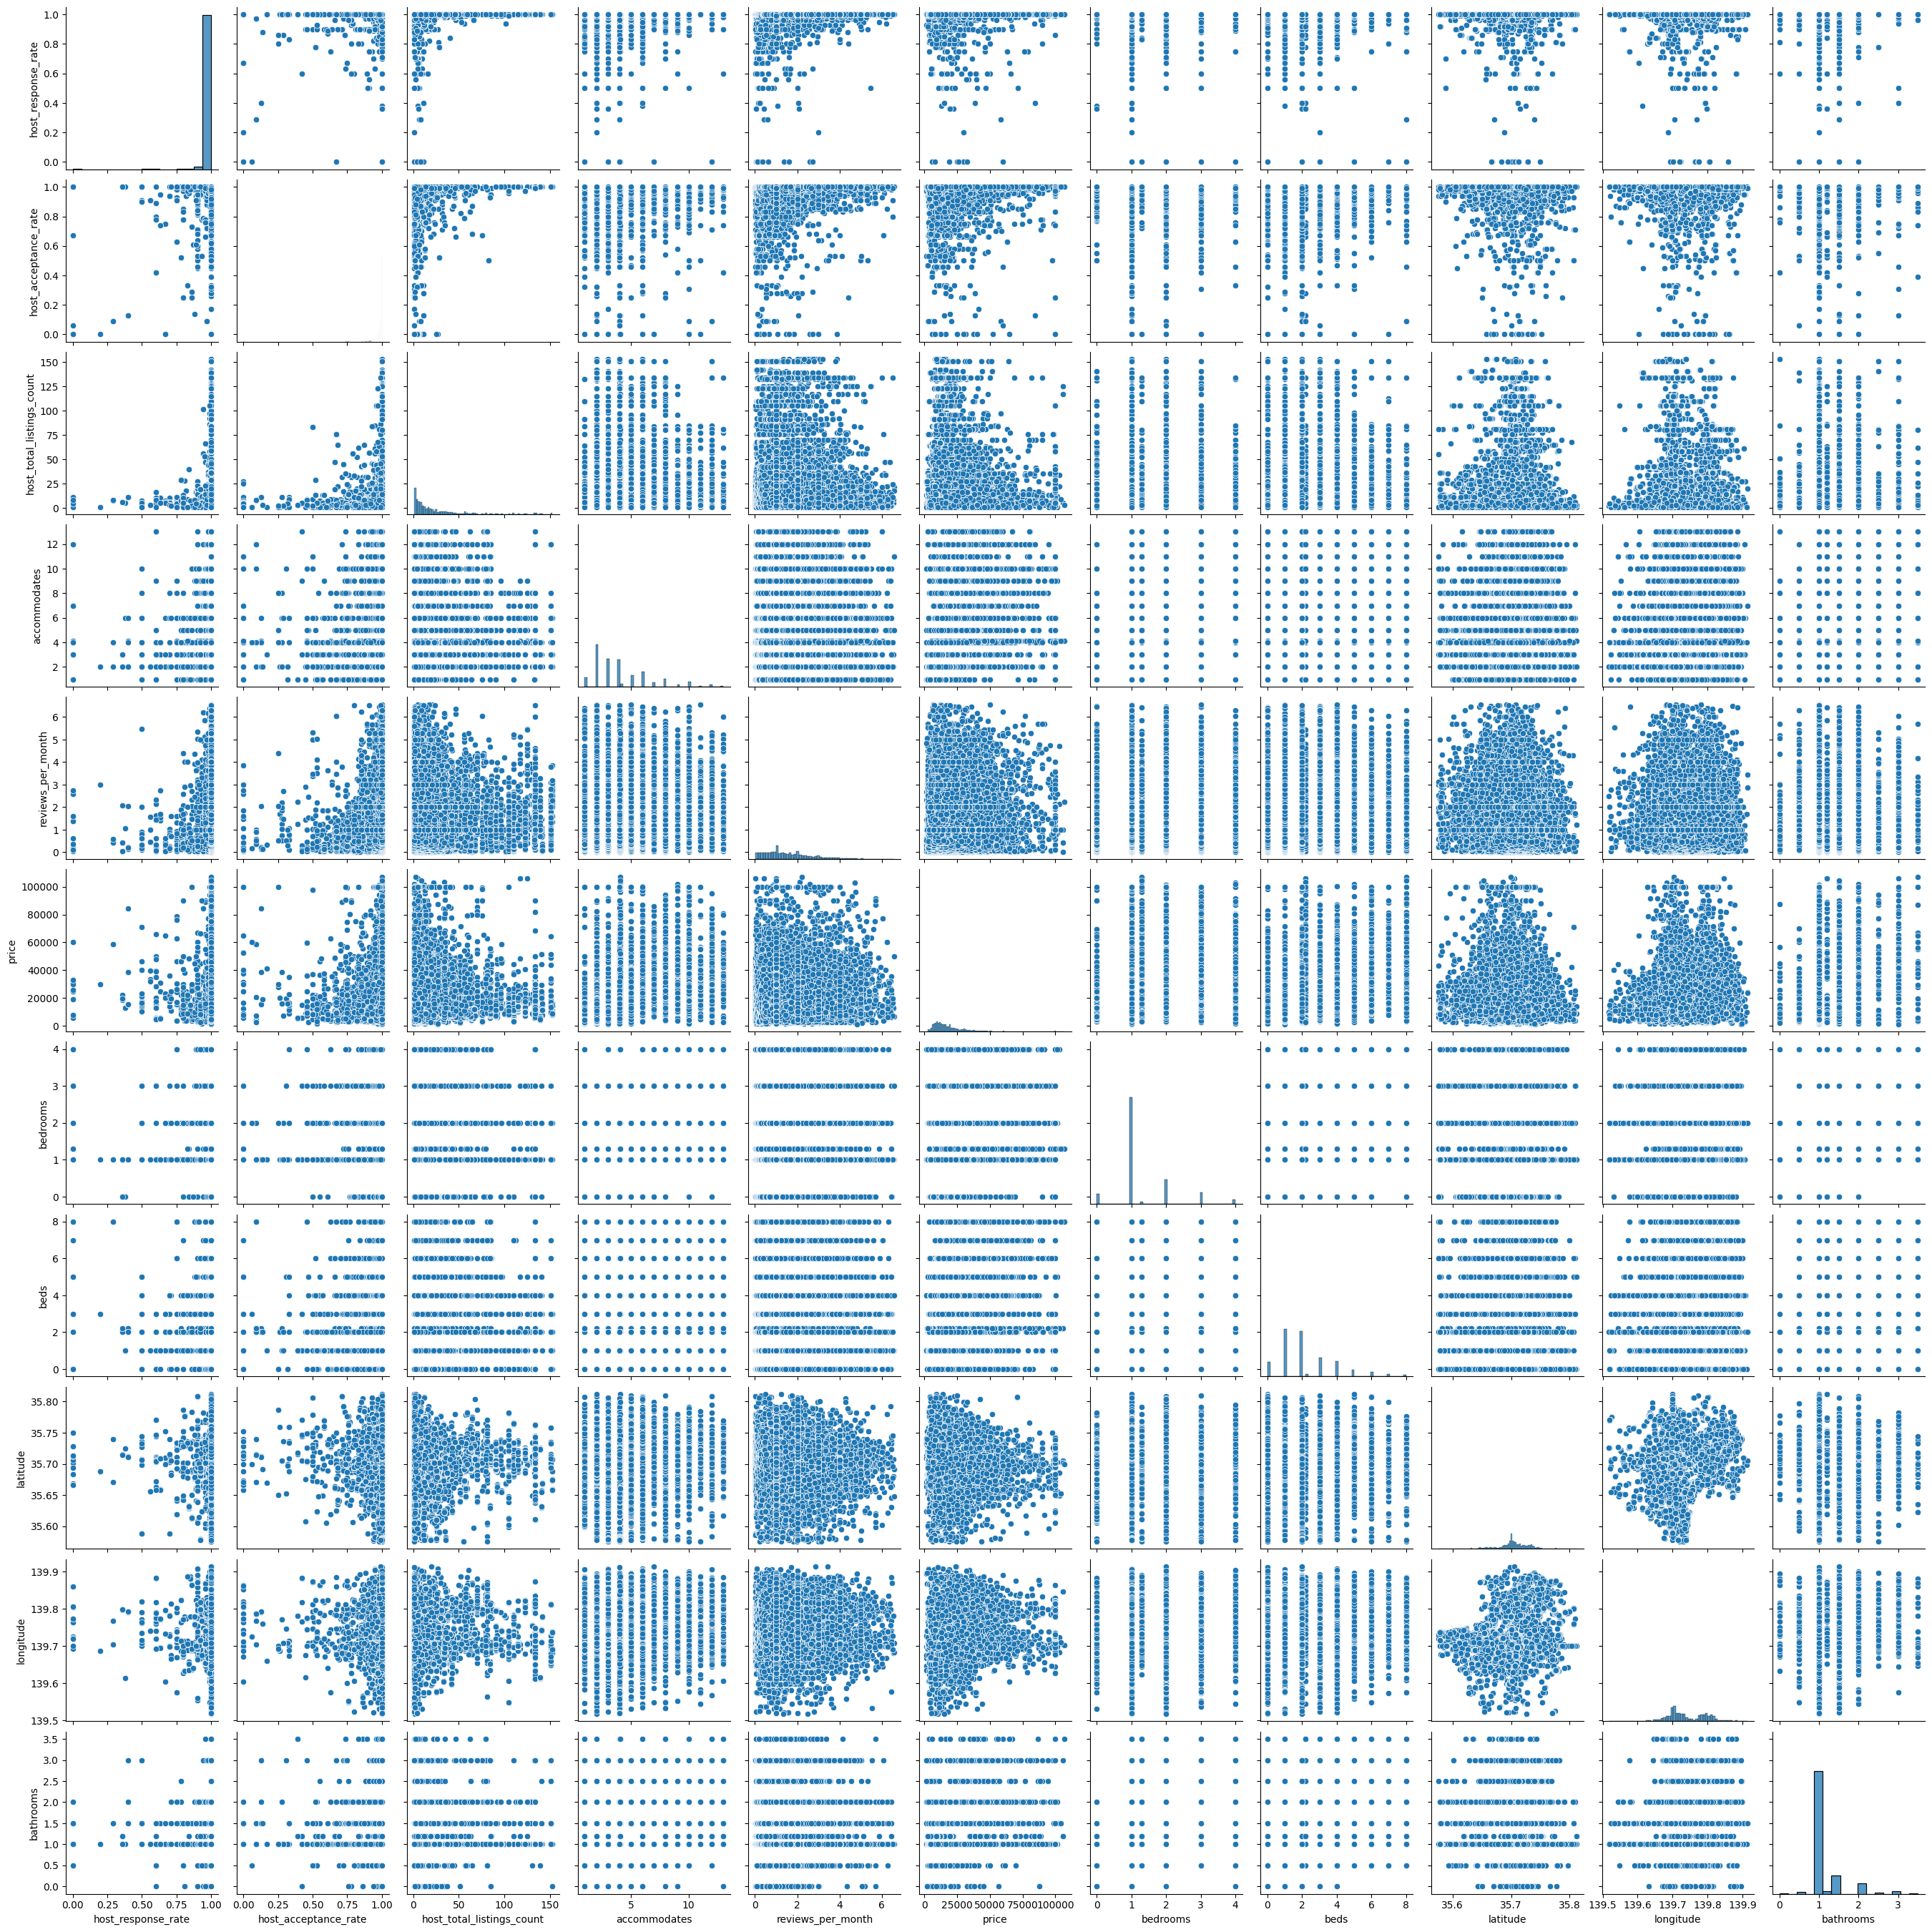

In [64]:
sns.pairplot(variablesselec_t)

In [65]:
Vars_Indep= variablesselec_t[['bedrooms']]
Var_Dep= variablesselec_t['price']

In [66]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [67]:
#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return (a*x**2 + b)/ c*x


In [68]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, variablesselec_t['bedrooms'], variablesselec_t['price'])

In [69]:
parametros

array([-1.74300141e+01,  6.65103721e+02,  4.24599482e-02])

In [70]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, variablesselec_t['bedrooms'], variablesselec_t['price'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a*x**2 + b)/ c*x

In [71]:
yfit1

,bedrooms
0,15253.756384
1,15253.756384
2,28044.483750
3,15253.756384
4,15253.756384
...,...
16513,15253.756384
16514,15253.756384
16515,36384.735348
16516,15253.756384


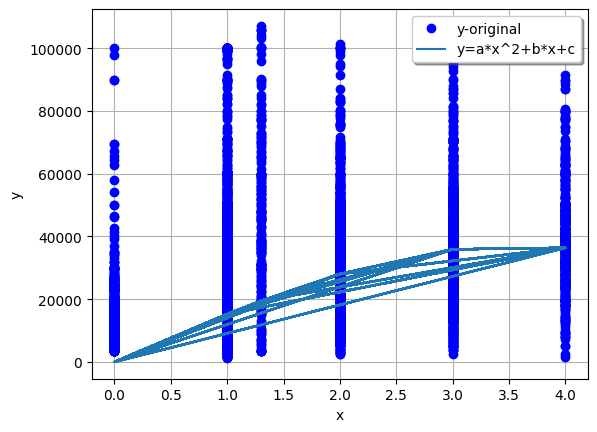

In [72]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [73]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2
np.sqrt(R2)

0.37095933968182987

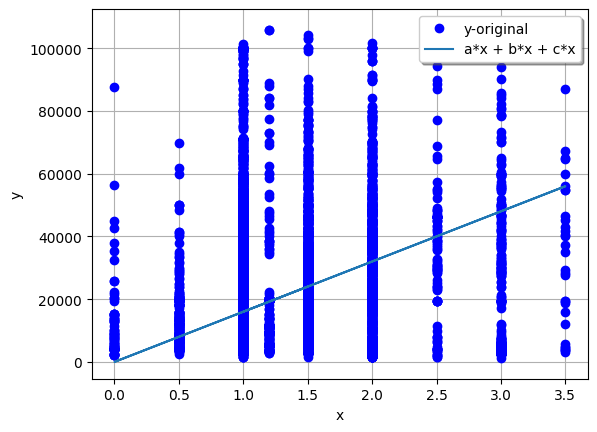

0.059233135265565263

In [74]:
#Seleccionamos nuestras variables independientes y dependientes
vars_indep_p2= variablesselec_t[['bathrooms']]
var_dep_p2= variablesselec_t['price']

#Redefinimos las variables 
x= vars_indep_p2
y= var_dep_p2

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return a*x + b*x + c*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, variablesselec_t['bathrooms'], variablesselec_t['price'])

parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, variablesselec_t['bathrooms'], variablesselec_t['price'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x + b*x + c*x

yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
R2
np.sqrt(R2)

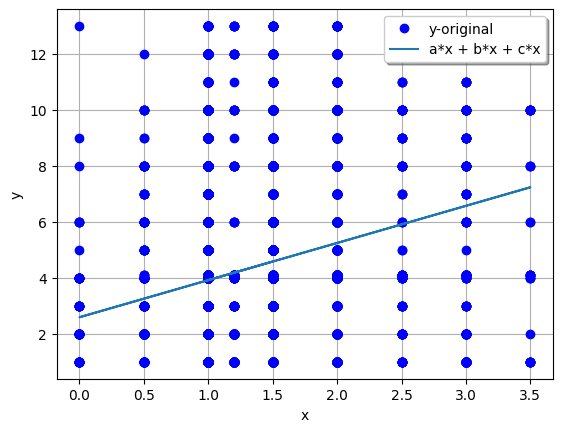

0.2115951412895784

In [75]:
#Seleccionamos nuestras variables independientes y dependientes
vars_indep_p2= variablesselec_t[['bathrooms']]
var_dep_p2= variablesselec_t['accommodates']

#Redefinimos las variables 
x= vars_indep_p2
y= var_dep_p2

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, variablesselec_t['bathrooms'], variablesselec_t['accommodates'])

parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, variablesselec_t['bathrooms'], variablesselec_t['accommodates'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.abs(x) + b*x + c

yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
R2
np.sqrt(R2)

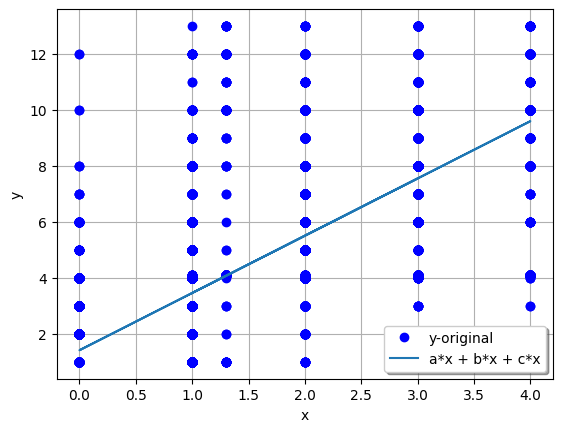

0.6623010178386648

In [76]:
#Seleccionamos nuestras variables independientes y dependientes
vars_indep_p2= variablesselec_t[['bedrooms']]
var_dep_p2= variablesselec_t['accommodates']

#Redefinimos las variables 
x= vars_indep_p2
y= var_dep_p2

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, variablesselec_t['bedrooms'], variablesselec_t['accommodates'])

parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, variablesselec_t['bedrooms'], variablesselec_t['accommodates'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.abs(x) + b*x + c

yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
R2
np.sqrt(R2)

/var/folders/19/7c2smbhs6b3g5ffy1ph3r__m0000gn/T/ipykernel_4981/1286419154.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, variablesselec_t['bedrooms'], variablesselec_t['host_response_rate'])
/var/folders/19/7c2smbhs6b3g5ffy1ph3r__m0000gn/T/ipykernel_4981/1286419154.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, variablesselec_t['bedrooms'], variablesselec_t['host_response_rate'])


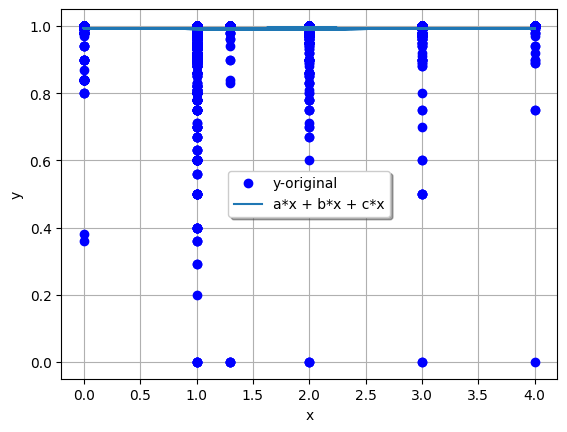

0.018348272109848553

In [77]:
#Seleccionamos nuestras variables independientes y dependientes
vars_indep_p2= variablesselec_t[['bedrooms']]
var_dep_p2= variablesselec_t['host_response_rate']

#Redefinimos las variables 
x= vars_indep_p2
y= var_dep_p2

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return a*np.tan(x) + b 

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, variablesselec_t['bedrooms'], variablesselec_t['host_response_rate'])

parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, variablesselec_t['bedrooms'], variablesselec_t['host_response_rate'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.tan(x) + b 

yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
R2
np.sqrt(R2)

/var/folders/19/7c2smbhs6b3g5ffy1ph3r__m0000gn/T/ipykernel_4981/3168356448.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, variablesselec_t['bathrooms'], variablesselec_t['host_response_rate'])
/var/folders/19/7c2smbhs6b3g5ffy1ph3r__m0000gn/T/ipykernel_4981/3168356448.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, variablesselec_t['bathrooms'], variablesselec_t['host_response_rate'])


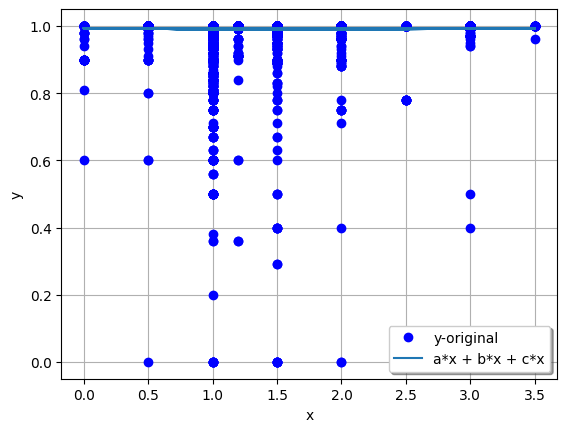

0.027791185536465875

In [78]:
#Seleccionamos nuestras variables independientes y dependientes
vars_indep_p2= variablesselec_t['bathrooms']
var_dep_p2= variablesselec_t['host_response_rate']

#Redefinimos las variables 
x= vars_indep_p2
y= var_dep_p2

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return a*np.tan(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, variablesselec_t['bathrooms'], variablesselec_t['host_response_rate'])

parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, variablesselec_t['bathrooms'], variablesselec_t['host_response_rate'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.tan(x) + b

yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
R2
np.sqrt(R2)

/var/folders/19/7c2smbhs6b3g5ffy1ph3r__m0000gn/T/ipykernel_4981/2742885359.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, variablesselec_t['bathrooms'], variablesselec_t['host_acceptance_rate'])
/var/folders/19/7c2smbhs6b3g5ffy1ph3r__m0000gn/T/ipykernel_4981/2742885359.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, variablesselec_t['bathrooms'], variablesselec_t['host_acceptance_rate'])


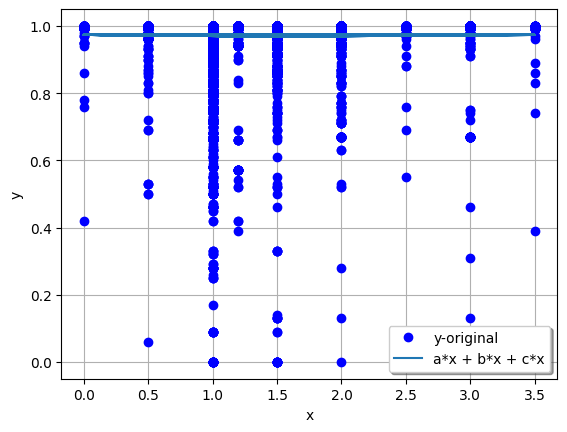

0.017798027137546593

In [79]:
#Seleccionamos nuestras variables independientes y dependientes
vars_indep_p2= variablesselec_t['bathrooms']
var_dep_p2= variablesselec_t['host_acceptance_rate']

#Redefinimos las variables 
x= vars_indep_p2
y= var_dep_p2

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return a*np.tan(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, variablesselec_t['bathrooms'], variablesselec_t['host_acceptance_rate'])

parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, variablesselec_t['bathrooms'], variablesselec_t['host_acceptance_rate'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.tan(x) + b
yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
R2
np.sqrt(R2)

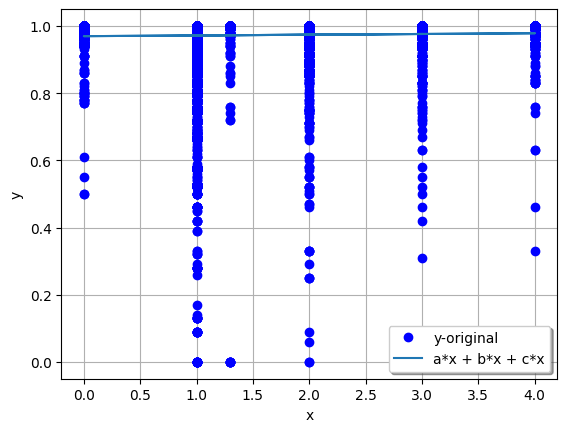

0.021569710313968673

In [80]:
#Seleccionamos nuestras variables independientes y dependientes
vars_indep_p2= variablesselec_t['bedrooms']
var_dep_p2= variablesselec_t['host_acceptance_rate']

#Redefinimos las variables 
x= vars_indep_p2
y= var_dep_p2

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, variablesselec_t['bedrooms'], variablesselec_t['host_acceptance_rate'])

parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, variablesselec_t['bedrooms'], variablesselec_t['host_acceptance_rate'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.abs(x) + b*x + c
yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
R2
np.sqrt(R2)

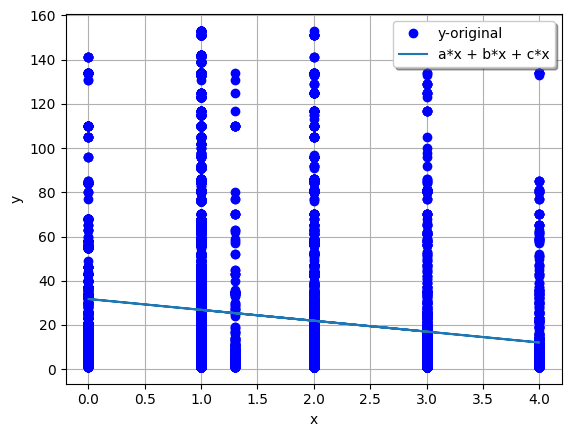

0.12698069141780424

In [81]:
#Seleccionamos nuestras variables independientes y dependientes
vars_indep_p2= variablesselec_t['bedrooms']
var_dep_p2= variablesselec_t['host_total_listings_count']

#Redefinimos las variables 
x= vars_indep_p2
y= var_dep_p2

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, variablesselec_t['bedrooms'], variablesselec_t['host_total_listings_count'])

parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, variablesselec_t['bedrooms'], variablesselec_t['host_total_listings_count'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.abs(x) + b*x + c
yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
R2
np.sqrt(R2)

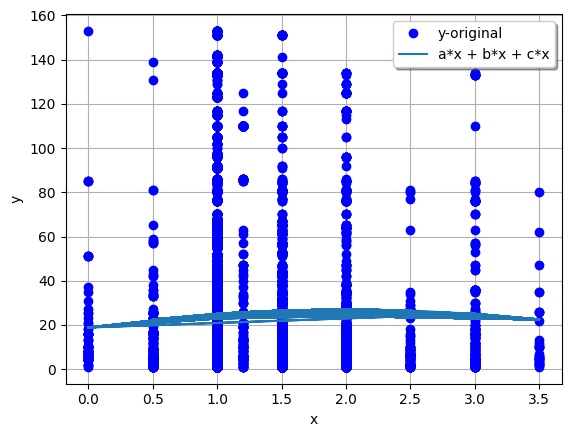

0.027828612584875283

In [82]:
#Seleccionamos nuestras variables independientes y dependientes
vars_indep_p2= variablesselec_t['bathrooms']
var_dep_p2= variablesselec_t['host_total_listings_count']

#Redefinimos las variables 
x= vars_indep_p2
y= var_dep_p2

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c 

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, variablesselec_t['bathrooms'], variablesselec_t['host_total_listings_count'])

parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, variablesselec_t['bathrooms'], variablesselec_t['host_total_listings_count'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2 + b*x + c
yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
R2
np.sqrt(R2)

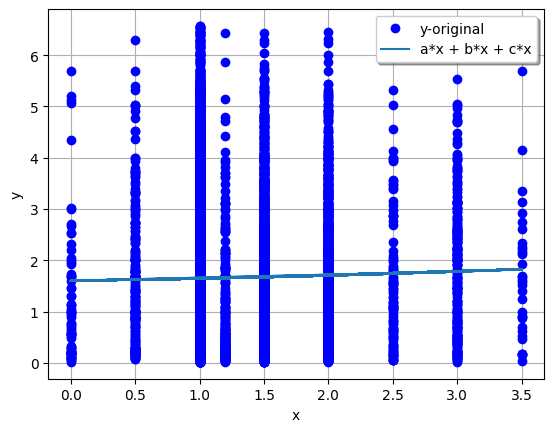

0.020822201132710466

In [83]:
#Seleccionamos nuestras variables independientes y dependientes
vars_indep_p2= variablesselec_t['bathrooms']
var_dep_p2= variablesselec_t['reviews_per_month']

#Redefinimos las variables 
x= vars_indep_p2
y= var_dep_p2

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, variablesselec_t['bathrooms'], variablesselec_t['reviews_per_month'])

parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, variablesselec_t['bathrooms'], variablesselec_t['reviews_per_month'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2 + b*x + c
yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
R2
np.sqrt(R2)

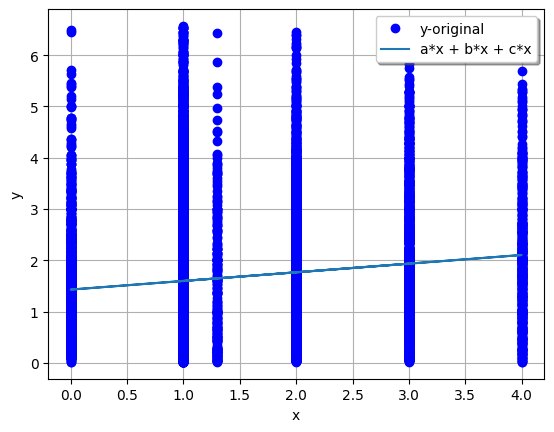

0.11397443257209741

In [84]:
#Seleccionamos nuestras variables independientes y dependientes
vars_indep_p2= variablesselec_t['bedrooms']
var_dep_p2= variablesselec_t['reviews_per_month']

#Redefinimos las variables 
x= vars_indep_p2
y= var_dep_p2

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return a*np.abs(x) + b*x + c 

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, variablesselec_t['bedrooms'], variablesselec_t['reviews_per_month'])

parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, variablesselec_t['bedrooms'], variablesselec_t['reviews_per_month'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.abs(x) + b*x + c 
yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
R2
np.sqrt(R2)